<a href="https://colab.research.google.com/github/12Brainer/matematica-matrices-transpuestas/blob/main/Trabajo_Pr%C3%A1ctico_s3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
from numpy.linalg import matrix_rank, inv, pinv, norm
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pandas as pd

# Matemática para Ciencia de los Datos
# Trabajo Práctico 2

Profesor: Juan Luis Crespo Mariño, basado en trabajo previo de Luis Alexánder Calvo Valverde

Instituto Tecnológico de Costa Rica,

Programa Ciencia de Datos

---

Fecha de entrega: Martes 13 de Mayo de 2025, a más tardar a las 6:00 pm.

Medio de entrega: Por medio del TEC-Digital.

Entregables: Un archivo jupyter ( .IPYNB ).

Estudiante(s):
1. **Brainer Fallas Prado**
1. **Raamsés Olivier Martínez Gutiérrez**



---

**Pregunta 1**

Considerando que la transpuesta de una matriz es el resultado de cambiar las filas a columnas. Sea una matriz $A\in\mathbb{R}^{m\times n}$, su transpuesta se escribe como $A^{T}\in\mathbb{R}^{n\times m}$ y sus entradas están dadas por:

\begin{equation}
\left(A^{T}\right)_{i,j}=A_{j,i}.
\end{equation}

Proponga Usted dos matrices, $A\in\mathbb{R}^{4\times 3}$ y $B\in\mathbb{R}^{3\times 4}$ (no las busque en Internet, trate de proponer los valores por si mismo), y utilizando numpy muestre que las siguientes propiedades se cumplen con sus matrices propuestas.

**Note** que ni A ni B son cuadradas, y no tienen las mismas dimensiones.


**1.1 (15 puntos)**

- $\left(A^{T}\right)^{T}=A$


In [ ]:
#definiendo matriz A
A = np.array([[2, 4, 6], [-3, 5, -2], [-4, 2, 8], [5, 1, 4]])
print(A)

#mostramos dimensiones de matriz A
print(A.shape)

[[ 2  4  6]
 [-3  5 -2]
 [-4  2  8]
 [ 5  1  4]]
(4, 3)


In [ ]:
#obteniendo matriz transpuesta de A
T_A = np.transpose(A)
print(T_A)

[[ 2 -3 -4  5]
 [ 4  5  2  1]
 [ 6 -2  8  4]]


In [ ]:
#obteniendo matriz transpuesta de la transpuesta de A
T_T_A = np.transpose(T_A)
print(T_T_A)

[[ 2  4  6]
 [-3  5 -2]
 [-4  2  8]
 [ 5  1  4]]


In [ ]:
#comparación entre componentes de las matrices A y la transpuesta de la transpuesta de A
print(np.equal(A, T_T_A))

[[ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]]


**1.2 (15 puntos)**

- $\left(AB\right)^{T}=B^{T}A^{T}$


In [ ]:
#definiendo matriz B
B = np.array([[6, 3, 3, 5], [-3, -1, 0, 2], [4, 10, 1.5, 6]])\

#mostramos dimensiones de matriz B
print(B.shape)

#multiplicación entre matrices A y B con numpy
AB = np.matmul(A, B)



(3, 4)


In [ ]:
#matriz transpuesta del producto matricial entre A y B
T_AB = np.transpose(AB)
print(T_AB)

[[ 24. -41.   2.  43.]
 [ 62. -34.  66.  54.]
 [ 15. -12.   0.  21.]
 [ 54. -17.  32.  51.]]


In [ ]:
#matriz transpuesta de B
T_B = np.transpose(B)

#matriz transpuesta de A
T_A = np.transpose(A)

#producto matricial entre las matrices transpuestas de B y A
TBTA = np.matmul(T_B, T_A)
print(TBTA)


#comparación entre componentes de las matrices T_AB y TBTA
print(np.equal(T_AB, TBTA))

[[ 24. -41.   2.  43.]
 [ 62. -34.  66.  54.]
 [ 15. -12.   0.  21.]
 [ 54. -17.  32.  51.]]
[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]


**1.3 (15 puntos)**

Para este ejercicio, **proponga dos matrices de igual dimensionalidad**


- $\left(A+B\right)^{T}=A^{T}+B^{T}$.


In [ ]:
#definiendo matrices 4x3
A = np.array([[2, 4, 6], [-3, 5, -2], [-4, 2, 8], [5, 1, 4]])
B = np.array([[10, 2, 5], [4, -3, -5], [-1, -2, 8], [7, 8, 0]])

#comprobando dimensiones
print(A.shape, B.shape)

#sumando las matrices A y B
A_sum_B = A + B
#mostrando la suma de A y B
print(A_sum_B)

#obteniendo matriz transpuesta de la suma de A y B
T_A_sum_B = np.transpose(A_sum_B)
#mostrando la matriz transpuesta de la suma de A y B
print(T_A_sum_B)



(4, 3) (4, 3)
[[12  6 11]
 [ 1  2 -7]
 [-5  0 16]
 [12  9  4]]
[[12  1 -5 12]
 [ 6  2  0  9]
 [11 -7 16  4]]


In [ ]:
#transpuesta de A
T_A = np.transpose(A)
#transpuesta de B
T_B = np.transpose(B)

#suma de transpuestas de A y B respectivamente
T_A_sum_T_B = T_A + T_B
print(T_A_sum_T_B)

[[12  1 -5 12]
 [ 6  2  0  9]
 [11 -7 16  4]]


In [ ]:
#comprobación final de propiedad
print(np.equal(T_A_sum_B, T_A_sum_T_B))

[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]


---

**Pregunta 2**


Un conjunto de vectores $\left\{ \vec{x}_{1},\vec{x}_{2},\ldots,\vec{x}_{n}\right\} \in\mathbb{R}^{m}$ se dice que es linealmente independiente, si ningún vector de tal conjunto puede ser representado como una combinación lineal del resto de vectores. De lo contrario, si uno de los vectores en tal conjunto puede ser representado como una combinación lineal del resto de vectores, entonces los vectores son linealmente dependientes, lo que se expresa como:

\begin{equation}
\vec{x}_{j}=\sum_{i=1}^{n-1}\alpha_{i}\vec{x}_{i}
\end{equation}

para cualquier conjunto de valores escalares $\alpha_{1},\ldots,\alpha_{n-1}\in\mathbb{R}$ se dice que el vector $\vec{x}_{j}\in\mathbb{R}^{m}$ es linealmente dependiente de los vectores $\vec{x}_{i}$.


**2.1 (15 puntos)**

Proponga una matriz $A\in\mathbb{R}^{4\times 3}$, cuyos vectores columnas sean linealmente independientes, calcule su rango para mostrar que es de rango $3$ (puede utilizar matrix_rank).


In [ ]:
A = np.array([[2, 1, 4], [1, 0, 2], [0, 1, 3], [3, 1, 6]])
print(A)
print(f"Rango de la matriz: {matrix_rank(A)}")


[[2 1 4]
 [1 0 2]
 [0 1 3]
 [3 1 6]]
Rango de la matriz: 3


**2.2 (15 puntos)**

Ahora haga los cambios necesarios a su matriz de manera que pase a rango $2$.

In [ ]:
A_mod = np.array([[2, 1, 4], [1, 0, 2], [2, 0, 4], [4, 1, 8]])
print(A_mod)
print("nuevo rango:" , matrix_rank(A_mod))

[[2 1 4]
 [1 0 2]
 [2 0 4]
 [4 1 8]]
nuevo rango: 2


---

**Pregunta 3 (25 puntos)**

Utilizando el archivo "Dataset_usar.csv", haga:
- Cargue el archivo.
- Utilizando el modelo $Ax=b$
    - Conforme la matriz $A$ con las primeras 8 columnas.
    - Conforme el vector $b$ con la última columna de la derecha.
    - Calcule el vector de pesos ($x$), del tipo $A^{-1}b=x$
    - Calcule un b_estimado con $A$ e $x$
    - Calcule la norma 2 de la diferencia entre b y b_estimado.
    - Grafique b y b_estimado.



Mostrando primeras 8 columnas como matriz
[[1.         0.18656716 0.1559633  ... 0.33333333 0.         1.        ]
 [1.         0.81343284 0.76146789 ... 0.33333333 1.         0.        ]
 [1.         0.41044776 0.37614679 ... 0.33333333 1.         0.        ]
 ...
 [1.         0.43283582 0.44036697 ... 0.33333333 1.         0.        ]
 [1.         0.57462687 0.59633028 ... 0.33333333 0.         1.        ]
 [1.         0.88059701 0.88990826 ... 0.33333333 0.         1.        ]]
La matriz no tiene inversa
Vector x:
[-4.86806821e+09 -7.10562178e-02  2.04691410e-03  8.44010112e-02
  8.93133383e-01 -7.68537327e-02  4.86806821e+09  4.86806821e+09]
Vector b estimado:
[0.00796986 0.39447975 0.06288719 0.12682724 0.13788795 0.10212326
 0.0095892  0.40656948 0.17784786 0.29594231 0.27976227 0.25329208
 0.17395496 0.17125607 0.24565792 0.27948189 0.35766983 0.53561115
 0.63782787 0.08472347 0.09362602 0.17207909 0.37233067 0.0515728
 0.04109287 0.13395405 0.05614567 0.058218   0.19794655 0.19

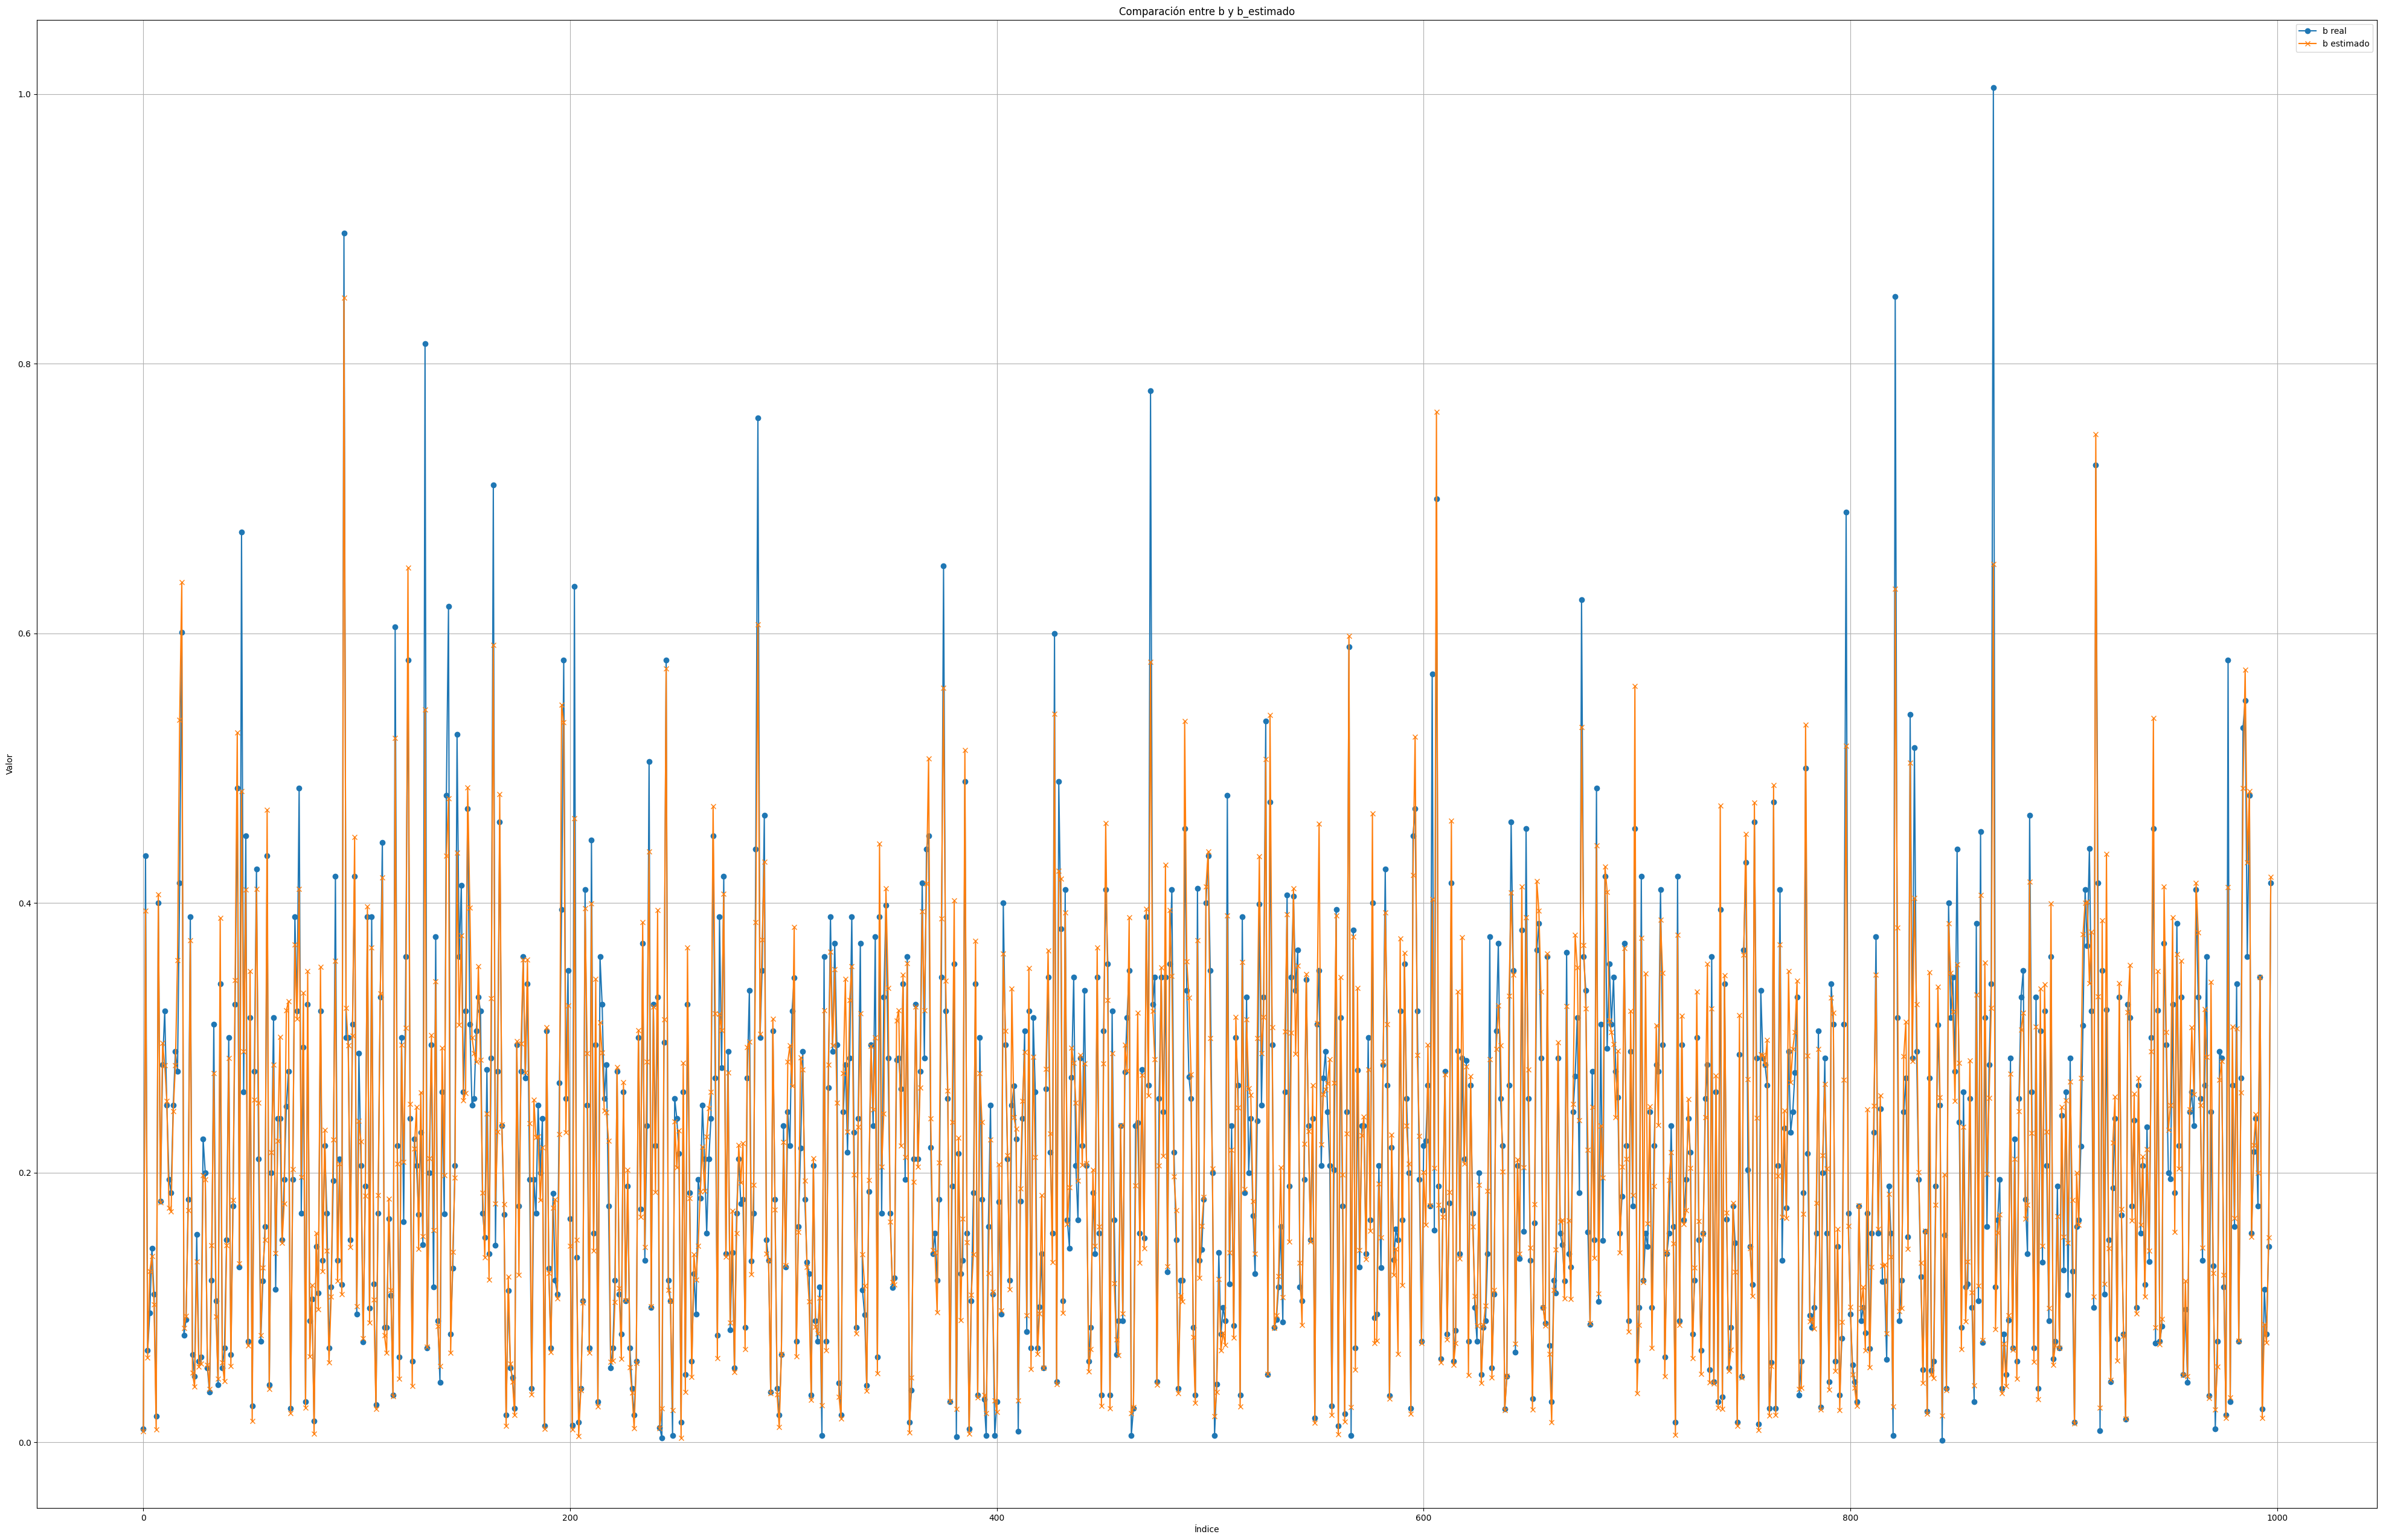

In [ ]:
# carga archivos
csv_data = "Dataset_usar.csv"
df = pd.read_csv(csv_data, header = 0, delimiter=';')


#convertimos a matriz de numpy
datos = pd.DataFrame(df).to_numpy()

# En cada vector columna hay un atributo
# El atributo1 está en datos[:,0]
# El atributo2 está en datos[:,1]
#datos[:,2]
# y así sucesivamente


#seleccionar primeras 8 columnas
print("Mostrando primeras 8 columnas como matriz")
A = datos[:,:8]
print(A)
print(100*'=')


#seleccionar ultima columna
b = datos[:,8]

#validar cálculo de matriz inversa de A
try:
    A_inv = inv(A)
except:
  print("La matriz no tiene inversa")
  #calcular pseudoInversa de matriz A
  pinv_A = pinv(A)
  # print(pinv_A)


#calcular vector x
x = np.matmul(pinv_A, b)
print("Vector x:")
print(x)
print(100*'=')

#calcular b_estimado
b_estimado = np.matmul(A, x)
print("Vector b estimado:")
print(b_estimado)
print(100*'=')

#vector diferencia entre b y b_estimado
print("Vector diferencia entre b y b_estimado:")
diff = b - b_estimado
print(diff)
print(100*'=')

#calcular norma 2 a vector de diferencias
print("Norma 2 de la diferencia entre b y b_estimado:")
norm_2 = norm(diff, 2)
print(norm_2)
print(100*'=')


# Graficar
plt.figure(figsize=(50, 32))
plt.plot(b, label='b real', marker='o')
plt.plot(b_estimado, label='b estimado', marker='x')
plt.title('Comparación entre b y b_estimado')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
